In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("economic_covid19.csv")
# print('\n', data.isna().sum())
# gabisa diisi dengan rata-ratanya karena tiap negara berbeda, jadi diisi dengan 0.
data = data.replace(to_replace = np.nan, value = 0.0) 
# print('\n', data.isna().sum())
data.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [4]:
del data["CODE"]
del data["DATE"]
data

,COUNTRY,HDI,TC,TD,STI,POP,GDPCAP
0,Afghanistan,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
1,Afghanistan,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2,Afghanistan,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
3,Afghanistan,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
4,Afghanistan,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
...,...,...,...,...,...,...,...
50413,Zimbabwe,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,Zimbabwe,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,Zimbabwe,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,Zimbabwe,0.535,9.000853,5.442418,4.341855,16.514381,7.549491


In [5]:
data = data[data.COUNTRY != 'Kosovo']

country = data.COUNTRY.unique().tolist()
pop_world = data.POP.unique().tolist()
hdi_world = []
gdp_world = []
cases_country = []
death_country = []
stringency_index = []

for i in country:
    hdi_world.append((data.loc[data.COUNTRY == i, 'HDI']).sum()/294)
    gdp_world.append(data.loc[data.COUNTRY == i, 'GDPCAP'].sum()/294)
    stringency_index.append(data.loc[data.COUNTRY == i, 'STI'].sum()/294)
    cases_country.append(data.loc[(data["COUNTRY"] == i), "TC"].sum())
    death_country.append(data.loc[(data["COUNTRY"] == i), "TD"].sum())
data_unik = pd.DataFrame(list(zip(country, pop_world, cases_country, death_country, hdi_world, stringency_index, gdp_world)), columns =['Country', 'Population', 'Cases', 'Deaths', 'HDI', 'Stringency_Index', 'GDP_Cap']) 
data_unik

,Country,Population,Cases,Deaths,HDI,Stringency_Index,GDP_Cap
0,Afghanistan,17.477233,2000.646094,1226.948181,0.498000,3.049673,7.497754
1,Albania,14.872537,1702.240756,929.368800,0.600765,3.005624,7.175622
2,Algeria,17.596309,2052.510847,1406.216387,0.754000,3.195168,9.540639
3,Andorra,11.254996,1465.828250,786.655112,0.659551,2.677654,0.000000
4,Angola,17.307957,1203.978763,590.138675,0.418952,2.965560,6.251093
...,...,...,...,...,...,...,...
204,Venezuela,17.163165,1810.819461,853.054819,0.566867,3.235752,7.244771
205,Vietnam,18.393706,1450.458104,261.537218,0.694000,3.710868,8.727759
206,Yemen,17.210890,1163.307314,928.044676,0.296721,2.369568,4.791665
207,Zambia,16.726989,1540.609667,727.554759,0.430000,2.645104,6.006236


In [8]:
# salah satu features = ['Country', 'Population', 'Cases', 'Deaths', 'HDI', 'Stringency_Index']
# target = ['GDP_Cap']
X = data_unik.iloc[:,1:2].values
y = data_unik.iloc[:,-1:].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [10]:
# Create linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

Coefficients: 
 [[0.69510274]]
Intercept: 
 [-3.81759954]
Mean squared error: 6.21
Coefficient of determination: 0.11


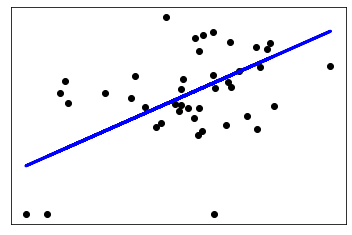

In [11]:
print('Coefficients: \n', reg.coef_)

print('Intercept: \n', reg.intercept_)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [13]:
# features = ['Country', 'Population', 'Cases', 'Deaths', 'HDI', 'Stringency_Index']
# target = ['GDP_Cap']

X = data_unik.iloc[:,1:-1].values
y = data_unik.iloc[:,-1:].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [15]:
# Create linear regression object
reg = LinearRegression()

# Train the model using the training sets
# mengambil satu fitur untuk dimodelkan
reg.fit(X_train[:,0:1], y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test[:,0:1])

Coefficients: 
 [[0.69510274]]
Intercept: 
 [-3.81759954]
Mean squared error: 6.21
Coefficient of determination: 0.11


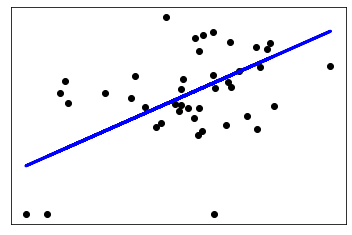

In [16]:
print('Coefficients: \n', reg.coef_)

print('Intercept: \n', reg.intercept_)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test[:,0:1], y_test, color='black')
plt.plot(X_test[:,0:1], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [18]:
# semua features = ['Country', 'Population', 'Cases', 'Deaths', 'HDI', 'Stringency_Index']
# target = ['GDP_Cap']

X = data_unik.iloc[:,1:-1].values
y = data_unik.iloc[:,-1:].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [20]:
# Create linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

In [22]:
print('Coefficients: \n', reg.coef_)

print('Intercept: \n', reg.intercept_)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
# plt.scatter(X_test[:,0:1], y_test, color='black')
# plt.plot(X_test[:,0:1], y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

Coefficients: 
 [[-2.02296324e-02  6.63485448e-04  9.56989945e-05  8.00707024e+00
   3.67608134e-01]]
Intercept: 
 [0.84210112]
Mean squared error: 2.13
Coefficient of determination: 0.69
